In [302]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import subprocess

from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

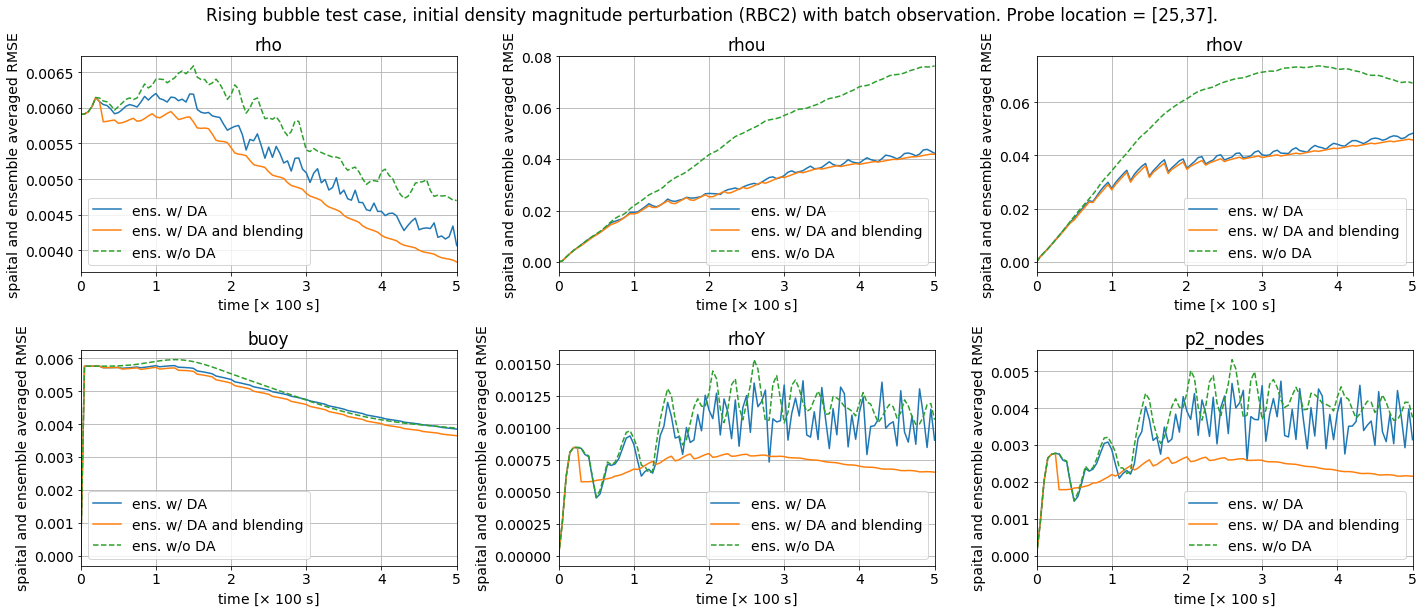

In [288]:
attributes = ['rho','rhou','rhov','buoy','rhoY','p2_nodes']

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

probe_loc = [25,37]

Nx = 100
Ny = 50
et = 5.0
p_ref = 8.61 * 1e4
times = np.arange(0.0,5.05,0.05)

ic = 'vertperturb'
ic = 'delth'

datyp = 'bo'
# datyp = 'rloc'

fn = '%s_%s_%s' %(base_fn,ic,datyp)

pl = pt.plotter_1d(figsize=(20,9),fontsize=14)
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
        
prt = utils.prt_time(debug=False)

for i,attribute in enumerate(attributes):
    ens_noda_suffix = '%s_noda' %ic
    ens_noda = tc.get_ensemble(times, 10, attribute, ens_noda_suffix, label_type='TIME')

    prt.prtt('load1')
    
    ens_1_suffix = '%s_%s' %(ic,datyp)
    ens_1 = tc.get_ensemble(times, 10, attribute, ens_1_suffix, label_type='TIME')
    
    prt.prtt('load2')
    
    ens_2_suffix = tc.cb_suffix(1,0, '%s_%s' %(ic,datyp))
    ens_2 = tc.get_ensemble(times, 10, attribute, ens_2_suffix, label_type='TIME')
    
    prt.prtt('load3')

    psinc = tc.get_ensemble(times, 1, attribute, 'psinc_delth_ref', label_type='TIME')
    
    prt.prtt('load4')
    
    ax = pl.get_ax(i)
    
    avg = True
    diff_ens_1 = tc.spatially_averaged_rmse(ens_1, psinc, avg=avg)
    diff_ens_2 = tc.spatially_averaged_rmse(ens_2, psinc, avg=avg)
    diff_noda = tc.spatially_averaged_rmse(ens_noda, psinc, avg=avg)
    
    ax.plot(times,diff_ens_1, label='ens. w/ DA')
    ax.plot(times,diff_ens_2, label='ens. w/ DA and blending')
    ax.plot(times,diff_noda, '--', label='ens. w/o DA')

    ax.set_title("%s" %attribute)
    ax.set_xlim([times[0],times[-1]])
    ax.set_ylabel('spaital and ensemble averaged RMSE')
    ax.set_xlabel(r'time [$\times$ 100 s]')
    ax.grid()
    ax.legend()

    prt.prtt('plt')
    
str_ic = {'vertperturb' : 'initial vertical position perturbation (RBC1)', 'delth' : 'initial density magnitude perturbation (RBC2)'}
str_datyp = {'bo' : 'batch observation', 'rloc' : 'grid-point localisation'}

plt.suptitle("%s test case, %s with %s. Probe location = [%i,%i]." %("Rising bubble", str_ic[ic], str_datyp[datyp], probe_loc[0], probe_loc[1]))
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.savefig('%s/%s.pdf' %(py_directory,fn))
plt.show()

ens w/o. blending - ens


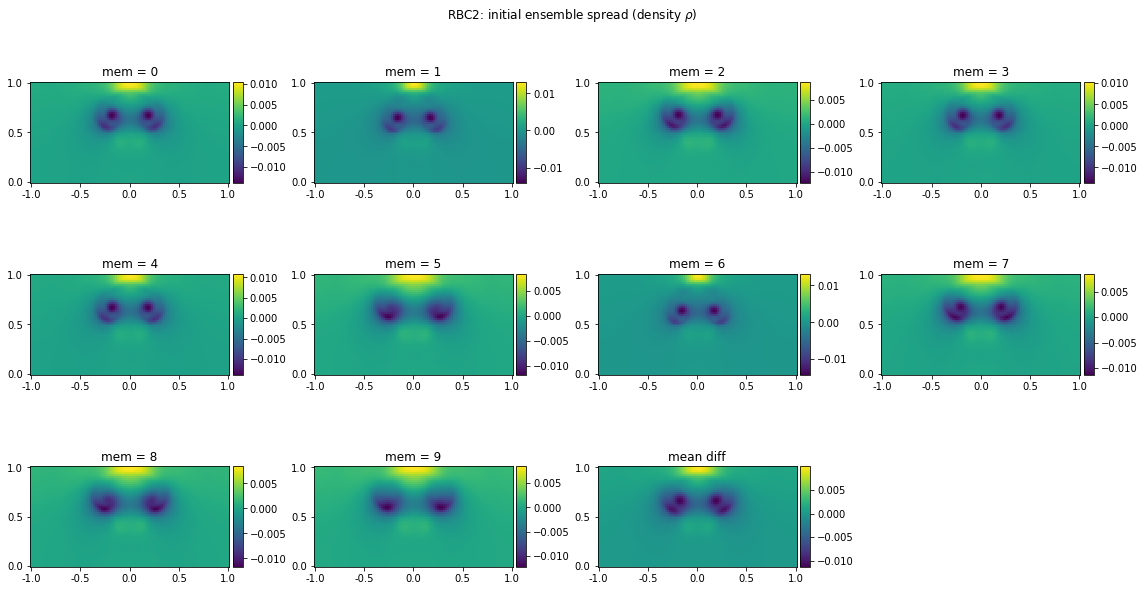

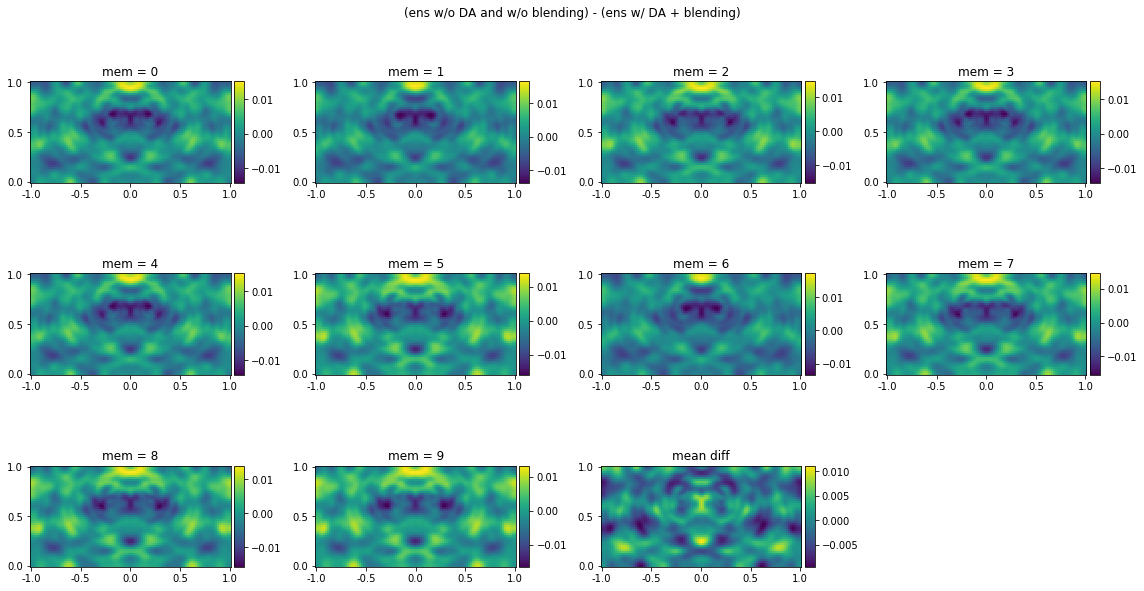

In [323]:

from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

sfx = "delth_rloc"
# sfx = "vertperturb_bo"
suffix = tc.cb_suffix(1,0,sfx)
# suffix = 'delth_rloc'
# suffix = 'delth_noda'

et = 5.0
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
time = 5.0

N = 10

attributes = ['p2_nodes']
# attributes = ['rhou']
for attribute in attributes:
    fn = tc.get_filename(N,suffix)
    path = tc.get_path(fn)
    arrs = tc.get_arr(path, time, N, attribute, label_type='TIME', inner=True, avg=False)
    ens_mean = tc.get_arr(path, time, N, attribute, label_type='TIME', inner=True, avg=True)

    fn = tc.get_filename(1,'comp')
    path = tc.get_path(fn)
#     comp = tc.get_arr(path, time, 1, attribute, label_type='TIME', inner=True)
    
    fn = tc.get_filename(1,'psinc_delth_ref')
    path = tc.get_path(fn)
    psinc = tc.get_arr(path, time, 1, attribute, label_type='TIME', inner=True)

# arrs = [arr-arr.mean() for arr in arrs]
# psinc -= psinc.mean()
# comp -= comp.mean()
# ens_mean -= ens_mean.mean()
arr_lst = [[arr.T-psinc.T,"mem = %i" %n] for n,arr in enumerate(arrs)]

# arr_lst = [[arr.T,"mem = %i" %(n+1)] for n,arr in enumerate(arrs)]
arr_lst0 = np.copy(arr_lst)

arr_lst.append([ens_mean.T-psinc.T,'mean diff'])
# arr_lst.append([ens_mean.T,'ensemble mean'])
# arr_lst.append([comp.T-psinc.T,'comp diff'])

x_locs = np.arange(0,101,25)
x_axs = np.linspace(-1.0,1.0,5)
y_locs = np.arange(0,51,25)
y_axs = np.linspace(0,1.0,3)

pl = pt.plotter(arr_lst, figsize=(16,9))

fn = 'RBC2_IC_rho'
pl.set_axes(x_locs=x_locs,x_axs=x_axs,y_locs=y_locs,y_axs=y_axs)
pl.plot(method='imshow',suptitle=r'RBC2: initial ensemble spread (density $\rho$)')

pl.save_fig(py_directory + fn)

# suffix = 'comp_rloc_noda'
suffix = 'delth_rloc'

for attribute in attributes:
    fn = tc.get_filename(N,suffix)
    path = tc.get_path(fn)
    arrs0 = tc.get_arr(path, time, N, attribute, label_type='TIME', inner=True, avg=False)
    ens_mean0 = tc.get_arr(path, time, N, attribute, label_type='TIME', inner=True, avg=True)
    
# arrs0 = [arr - arr.mean() for arr in arrs0]
ens_mean0 -= ens_mean.mean()
    
print("ens w/o. blending - ens")
print("=======================")
# arr_lst = [[arr.T-arrs[n].T,"mem = %i" %n] for n,arr in enumerate(arrs0)]
arr_lst = [[arr.T-psinc.T,"mem = %i" %n] for n,arr in enumerate(arrs0)]
arr_lst.append([ens_mean.T-ens_mean0.T,'mean diff'])
pl = pt.plotter(arr_lst, figsize=(16,9))
pl.set_axes(x_locs=x_locs,x_axs=x_axs,y_locs=y_locs,y_axs=y_axs)
pl.plot(method='imshow',suptitle="(ens w/o DA and w/o blending) - (ens w/ DA + blending)")

In [310]:
print(np.linspace(-1.0,1.0,7))

[-1.         -0.66666667 -0.33333333  0.          0.33333333  0.66666667
  1.        ]
